<a href="https://colab.research.google.com/github/Nilufaraliya/Descriptive-stats-in-R/blob/main/Simple_Linear_Regression_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SLR Delivery_time

1.Delivery time -> Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [ ]:
# import dataset
data=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Simple%20Linear%20Regression/delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [ ]:
data.shape

(21, 2)

In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


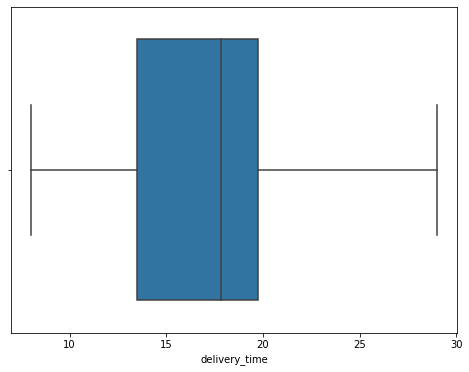

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


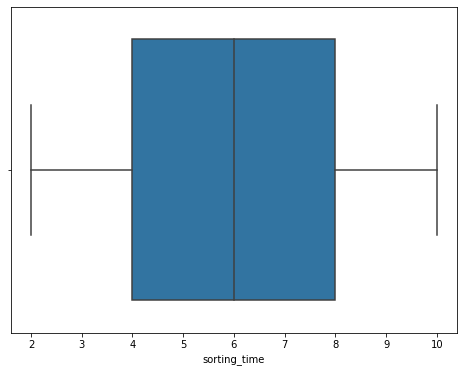

In [ ]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

# Checking for outliers with help of boxplot
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(data.delivery_time)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(data.sorting_time)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


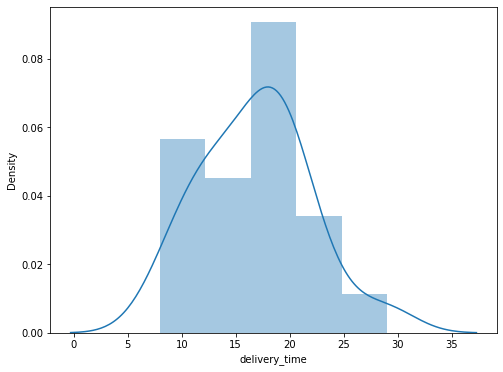

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


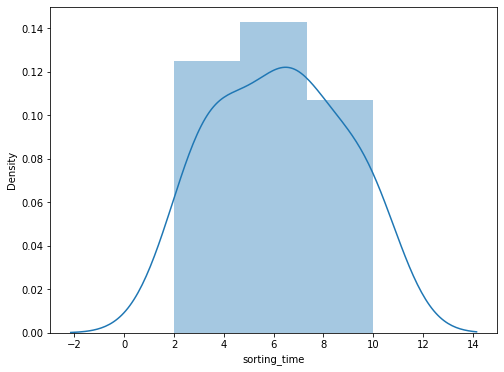

In [ ]:
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.distplot(data.delivery_time)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.distplot(data.sorting_time)
plt.show()

# Observation

From above boxplots and distplots, we can state that no outliers are present in the dataset

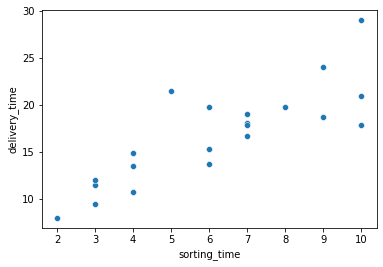

In [ ]:
# scatterplot of input variable i.e., sorting time Vs. output variable i.e., delivery time
sns.scatterplot(x = data['sorting_time'], y = data['delivery_time'])

# Observation

From above scatter plot,increase in sorting time leads to increase delivery time

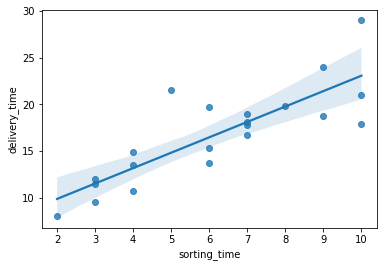

In [ ]:
# scatterplot with regression line of input variable i.e., sorting time Vs. output variable i.e., delivery time
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

# Correlation Matrix

In [ ]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


Correlation coefficient value r = 0.825997 indicates that there is a strong correlation between independent variable and dependent variable

# Model Building

In [ ]:
model = smf.ols('delivery_time ~ sorting_time', data = data).fit()

Getting important parameters from model

In [ ]:
# Coefficients Bo and B1
Bo, B1 = model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (model.tvalues, model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (model.rsquared, model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  6.5827339719970555
Sorting Time, B1:  1.649019896831246
tvalue:  Intercept       3.823349
sorting_time    6.387447
dtype: float64
pvalue:  Intercept       0.001147
sorting_time    0.000004
dtype: float64
R2:  0.6822714748417231
R2_Adj:  0.6655489208860244


Checking predictions of Model by equation
From the result Bo = 6.582734 and B1 = 1.649020, so our linear regression equation will become Y = Bo + B1X

Y = 6.582734 + 1.649020*X

In [ ]:
predicted_time = model.predict(data.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,23.072933
1,13.50,13.178814
2,19.75,16.476853
3,24.00,21.423913
4,29.00,23.072933
5,15.35,16.476853
6,19.00,18.125873
7,9.50,11.529794
8,17.90,23.072933
9,18.75,21.423913


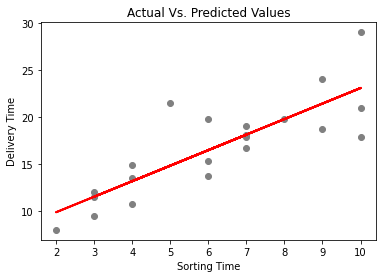

In [ ]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data.sorting_time, data.delivery_time,  color='gray')
plt.plot(data.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

Calculating Errors

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data.delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data.delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data.delivery_time, predicted_time))

Mean Absolute Error: 2.085740955188266
Mean Squared Error: 7.793311548584062
Root Mean Squared Error: 2.7916503270617654
R^2 Score :           0.6822714748417231


checking Normality Of Residuals Using The Anderson-Darling Test For Normal Distribution


p-value from the test: below 0.05 generally means non-normal: 0.1496009945346252
Residuals are normally distributed


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


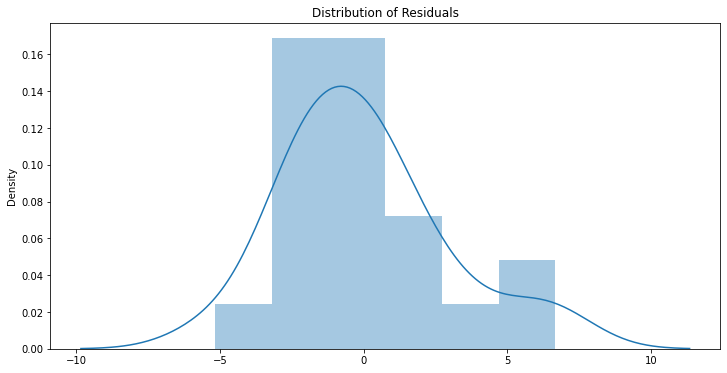

In [ ]:
from statsmodels.stats.diagnostic import normal_ad
residuals = data.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        10:53:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Building model with Logarithmic Transformation

In [ ]:
# Preparing data for model building
data1 = pd.DataFrame.copy(data)
data1['log_sorting_time'] = np.log(data1.sorting_time)
data1.head()

,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


Getting Important Parameters From Model

In [ ]:
# Coefficients Bo and B1
Bo, B1 = log_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  1.1596835115465756
Sorting Time, B1:  9.043413458205773
tvalue:  Intercept           0.472460
log_sorting_time    6.586789
dtype: float64
pvalue:  Intercept           0.641980
log_sorting_time    0.000003
dtype: float64
R2:  0.6954434611324223
R2_Adj:  0.6794141696130761


Checking predictions of Model by Equation
From the result Bo = 1.1596835115465813 and B1 = 9.043413458205762, so our linear regression equation will become Y = Bo + B1log(X) Y = 1.1596835115465813 + 9.043413458205762log(X)

In [ ]:
predicted_time = log_model.predict(data1.log_sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913
5,15.35,17.363305
6,19.00,18.757354
7,9.50,11.094889
8,17.90,21.982913
9,18.75,21.030094


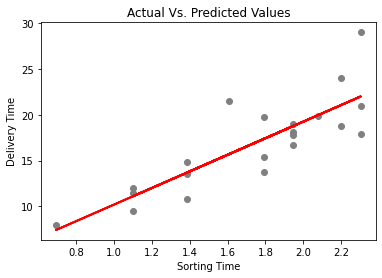

In [ ]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.log_sorting_time, data1.delivery_time,  color='gray')
plt.plot(data1.log_sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [ ]:
# Finding tvalues and pvalues
model1.tvalues , model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

Calculating Errors

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.delivery_time, predicted_time))

Mean Absolute Error: 2.047375706792902
Mean Squared Error: 7.470226320948425
Root Mean Squared Error: 2.733171476682066
R^2 Score :           0.6954434611324223


Checking Normality Of Residuals Using The Anderson-Darling Test For Normal Distribution

p-value from the test: below 0.05 generally means non-normal: 0.182011043219638
Residuals are normally distributed


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


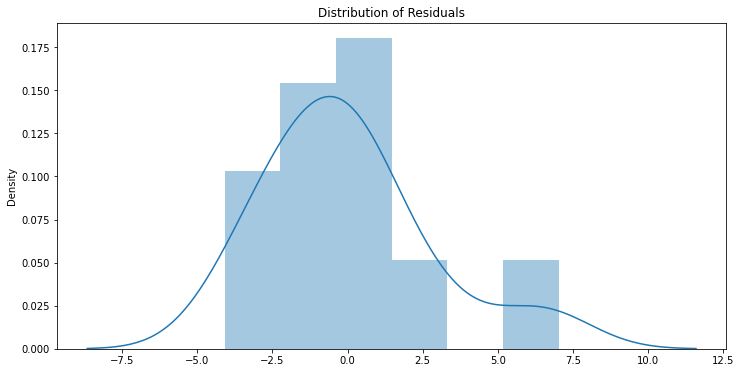

In [ ]:
residuals = data1.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        10:58:33   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Building Model With Exponential transformation

In [ ]:
# preparing data to build exponential model
data1['log_delivery_time'] = np.log(data1.delivery_time)
data1.head()

,delivery_time,sorting_time,log_sorting_time,log_delivery_time
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


In [ ]:
# Building model
exp_model = smf.ols('log_delivery_time ~ sorting_time', data = data1).fit()

Getting Important Parameters From Mode

In [ ]:
# Coefficients Bo and B1
Bo, B1 = exp_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (exp_model.tvalues, exp_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (exp_model.rsquared, exp_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  2.121371854893524
Sorting Time, B1:  0.10555159794344435
tvalue:  Intercept       20.601357
sorting_time     6.836088
dtype: float64
pvalue:  Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64
R2:  0.7109478980584187
R2_Adj:  0.6957346295351776


Checking Predictions Of Model By Equation
From the result Bo = 2.121371854893523 and B1 = 0.1055515979434444, so our linear regression equation will become log(Y) = Bo + B1X + e

log(Y) = 2.121371854893523 + 0.1055515979434444*X + e

In [ ]:
predicted_time = exp_model.predict(data1.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.log_delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,3.044522,3.176888
1,2.602690,2.543578
2,2.983153,2.754681
3,3.178054,3.071336
4,3.367296,3.176888
5,2.731115,2.754681
6,2.944439,2.860233
7,2.251292,2.438027
8,2.884801,3.176888
9,2.931194,3.071336


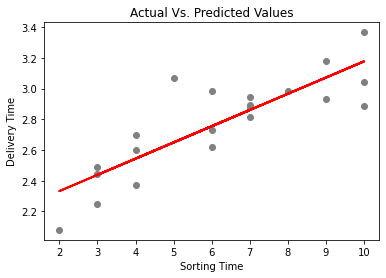

In [ ]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.sorting_time, data1.log_delivery_time,  color='gray')
plt.plot(data1.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

Calculating Errors

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.log_delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.log_delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.log_delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.log_delivery_time, predicted_time))

Mean Absolute Error: 0.1310730556090563
Mean Squared Error: 0.027876563581789988
Root Mean Squared Error: 0.16696276106302863
R^2 Score :           0.7109478980584187


In [ ]:
pred_df = pd.DataFrame({'Actual': np.exp(data1.log_delivery_time), 'Predicted': np.exp(predicted_time)})
pred_df

,Actual,Predicted
0,21.00,23.972032
1,13.50,12.725123
2,19.75,15.716034
3,24.00,21.570707
4,29.00,23.972032
5,15.35,15.716034
6,19.00,17.465597
7,9.50,11.450423
8,17.90,23.972032
9,18.75,21.570707


Checking Normality Of Residuals Using The Anderson-Darling Test For Normal Distribution

p-value from the test: below 0.05 generally means non-normal: 0.8006026322922348
Residuals are normally distributed


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


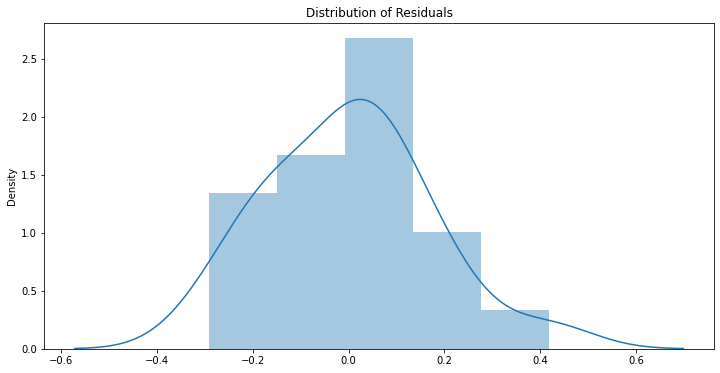

In [ ]:
residuals = data1.log_delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                        11:03:43   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Building Model With Square Root Transformation
√Y = a + b * X + e

In [ ]:
# preparing data to build model
data1['sqrt_delivery_time'] = np.sqrt(data1.delivery_time)
data1.head()

,delivery_time,sorting_time,log_sorting_time,log_delivery_time,sqrt_delivery_time
0,21.00,10,2.302585,3.044522,4.582576
1,13.50,4,1.386294,2.602690,3.674235
2,19.75,6,1.791759,2.983153,4.444097
3,24.00,9,2.197225,3.178054,4.898979
4,29.00,10,2.302585,3.367296,5.385165


In [ ]:
# Building model
sqrt_model = smf.ols('sqrt_delivery_time ~ sorting_time', data = data1).fit()

Getting Important Parameters From Mode

In [ ]:
# Coefficients Bo and B1
Bo, B1 = sqrt_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (sqrt_model.tvalues, sqrt_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (sqrt_model.rsquared, sqrt_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  2.772731039345034
Sorting Time, B1:  0.20663181804577496
tvalue:  Intercept       13.527452
sorting_time     6.723095
dtype: float64
pvalue:  Intercept       3.339366e-11
sorting_time    2.001215e-06
dtype: float64
R2:  0.704049871541756
R2_Adj:  0.6884735489913221


Checking Predictions Of Model By Equation
From the result Bo = 2.7727310393450324 and B1 = 0.20663181804577496, so our linear regression equation will become √Y = Bo + B1X + e

√Y = 2.7727310393450324 + 0.20663181804577496*X + e

In [ ]:
predicted_time = sqrt_model.predict(data1.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.sqrt_delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,4.582576,4.839049
1,3.674235,3.599258
2,4.444097,4.012522
3,4.898979,4.632417
4,5.385165,4.839049
5,3.917908,4.012522
6,4.358899,4.219154
7,3.082207,3.392626
8,4.230839,4.839049
9,4.330127,4.632417


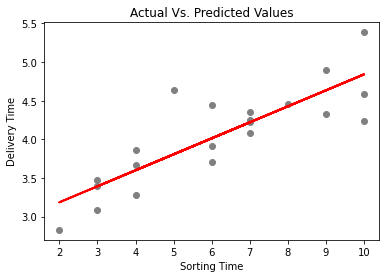

In [ ]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.sorting_time, data1.sqrt_delivery_time,  color='gray')
plt.plot(data1.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

Calculating Errors

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.sqrt_delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.sqrt_delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.sqrt_delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.sqrt_delivery_time, predicted_time))

Mean Absolute Error: 0.2562892192762891
Mean Squared Error: 0.11045382417324966
Root Mean Squared Error: 0.33234594050965877
R^2 Score :           0.704049871541756


In [ ]:
pred_df = pd.DataFrame({'Actual': (data1.sqrt_delivery_time)**2, 'Predicted': (predicted_time)**2})
pred_df

,Actual,Predicted
0,21.00,23.416397
1,13.50,12.954660
2,19.75,16.100332
3,24.00,21.459291
4,29.00,23.416397
5,15.35,16.100332
6,19.00,17.801258
7,9.50,11.509915
8,17.90,23.416397
9,18.75,21.459291


Checking Normality Of Residuals Using The Anderson-Darling Test For Normal Distribution

p-value from the test: below 0.05 generally means non-normal: 0.4177469231053469
Residuals are normally distributed


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


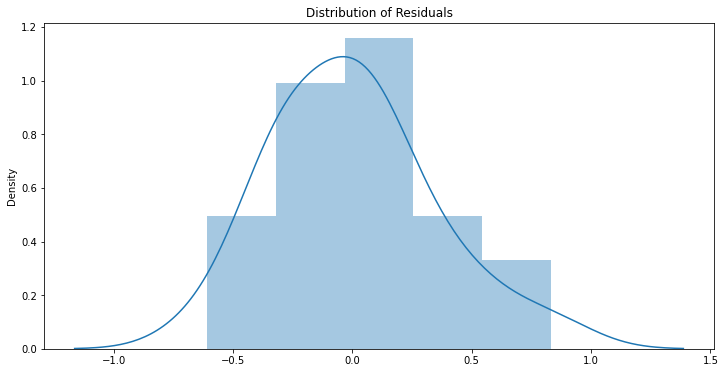

In [ ]:
residuals = data1.sqrt_delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.00e-06
Time:                        11:11:09   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion
WE have found that while transform the model, got various values for MAE, RMSE, MSE and R 2 Values. Summery of the following Models

# Salary_hike -> Build a prediction model for Salary_hike

2.Salary hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
data=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Simple%20Linear%20Regression/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [ ]:
# How many rows and columns are in the dataset
data.shape

(30, 2)

In [ ]:
# Description of Dataset
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# Brief info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


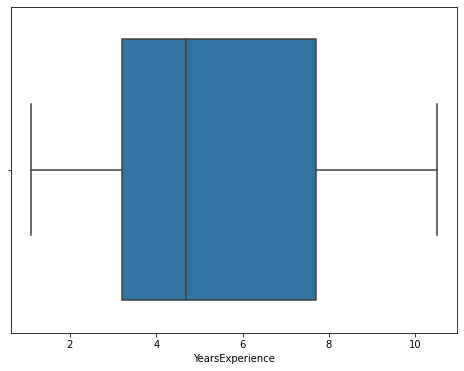

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


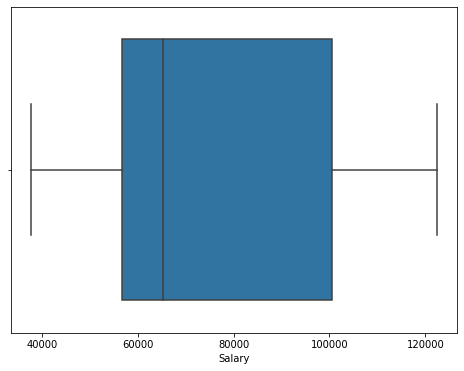

In [ ]:
# Checking for outliers with help of boxplot
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(data.YearsExperience)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(data.Salary)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


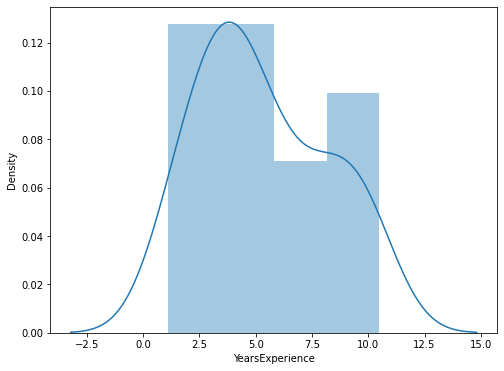

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


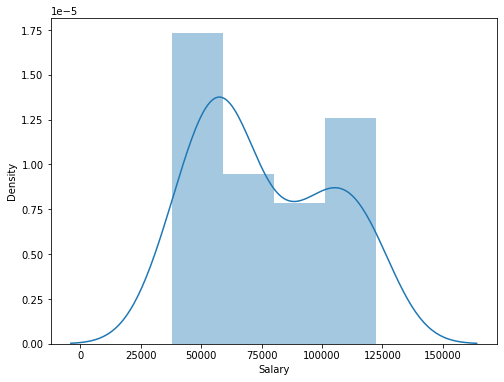

In [ ]:
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.distplot(data.YearsExperience)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.distplot(data.Salary)
plt.show()

# Observation

From above boxplots and distplots, we can state that no outliers are present 

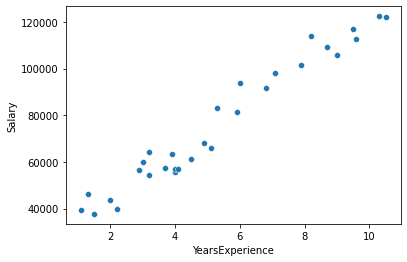

In [ ]:
# scatterplot of input variable i.e., YearsExperience Vs. output variable i.e., Salary
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])

From above scatter plot, increase in sorting time leads to increase delivery time

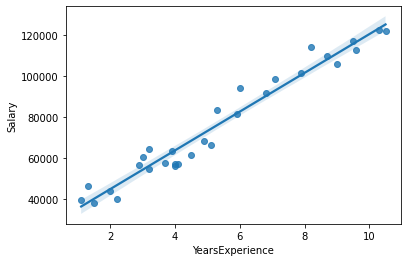

In [ ]:
# scatterplot with regression line of input variable i.e., sorting time Vs. output variable i.e., delivery time
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

Correlation matrix

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Observation:-
Correlation coefficient value r = 0.825997 indicates that there is a strong correlation between independent variable and dependent variable

In [ ]:
model = smf.ols('Salary ~ YearsExperience', data = data).fit()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


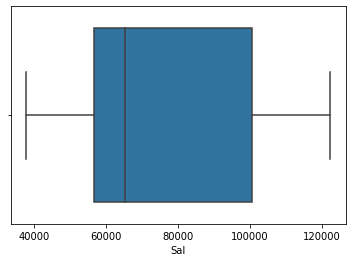

In [ ]:
sns.boxplot(data1['Sal'], orient='h')

Getting important Parameters From Model

In [ ]:
# Coefficients Bo and B1
Bo, B1 = model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (model.tvalues, model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (model.rsquared, model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  25792.20019866867
YearsExperience, B1:  9449.962321455081
tvalue:  Intercept          11.346940
YearsExperience    24.950094
dtype: float64
pvalue:  Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64
R2:  0.9569566641435086
R2_Adj:  0.9554194021486339


Checking Predictions Of Model By Equation

In [ ]:
predicted_salary = model.predict(data.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data.Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788


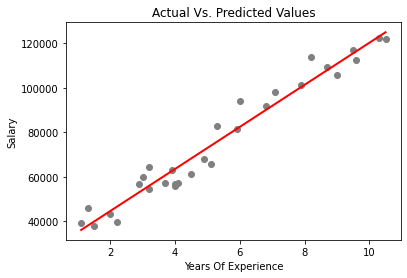

In [ ]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data.YearsExperience, data.Salary,  color='gray')
plt.plot(data.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

Calculating Errors

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data.Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data.Salary, predicted_salary))

Mean Absolute Error: 4644.201289443538
Mean Squared Error: 31270951.72228097
Root Mean Squared Error: 5592.043608760662
R^2 Score :           0.9569566641435086


Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.42797598800580494
Residuals are normally distributed


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


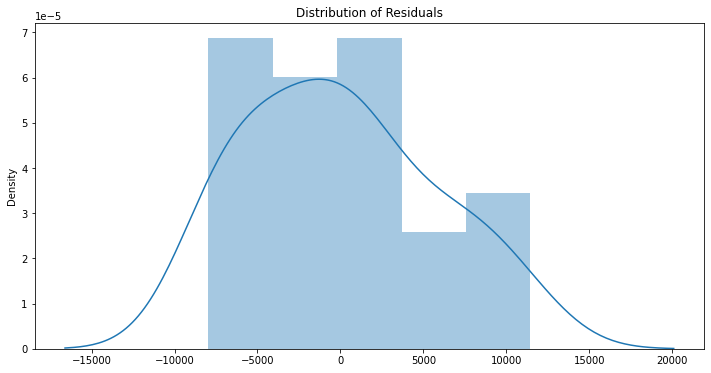

In [ ]:
from statsmodels.stats.diagnostic import normal_ad
residuals = data.Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        11:27:37   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Building Model With Logarithmic Transformation

In [ ]:
# Preparing data for model building
data1 = pd.DataFrame.copy(data)
data1['log_YearsExperience'] = np.log(data1.YearsExperience)
data1.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [ ]:
# Building model
log_model = smf.ols('Salary ~ log_YearsExperience', data = data1).fit()

Getting Important Parameters From Model

In [ ]:
# Coefficients Bo and B1
Bo, B1 = log_model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  14927.971770057287
YearsExperience, B1:  40581.98795977904
tvalue:  Intercept               2.895135
log_YearsExperience    12.791989
dtype: float64
pvalue:  Intercept              7.268813e-03
log_YearsExperience    3.250155e-13
dtype: float64
R2:  0.853888882875697
R2_Adj:  0.8486706286926862


Checking predictions of Model by equation
From the result,

Bo = 14927.97177005727

and

B1 = 40581.98795977906,

so our linear regression equation will become

Y = Bo + B1*log(X)

Y = 14927.97177005727 + 40581.98795977906*log(X)

In [ ]:
predicted_salary = log_model.predict(data1.log_YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data.Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,39343.0,18795.848339
1,46205.0,25575.235192
2,37731.0,31382.551905
3,43525.0,43057.262306
4,39891.0,46925.138875
5,56642.0,58136.050079
6,60150.0,59511.842441
7,54445.0,62130.943929
8,64445.0,62130.943929
9,57189.0,68022.718504


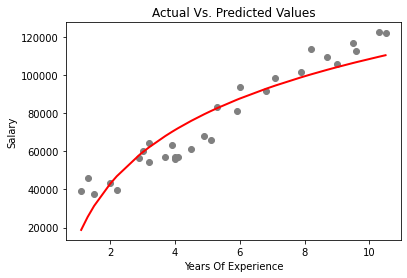

In [ ]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

Calculating Errors

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.Salary, predicted_salary))

Mean Absolute Error: 8443.584664486356
Mean Squared Error: 106149618.72183877
Root Mean Squared Error: 10302.893706228302
R^2 Score :           0.853888882875697


Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.43741940949412905
Residuals are normally distributed


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


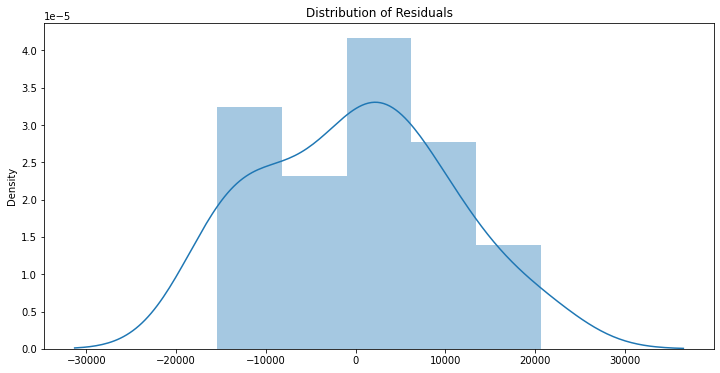

In [ ]:
residuals = data1.Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        11:32:40   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Building model with exponential transformation
log(Y) =α + βX + ε

In [ ]:
# preparing data to build exponential model
data1['log_Salary'] = np.log(data1.Salary)
data1.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


In [ ]:
 #Building model
exp_model = smf.ols('log_Salary ~ YearsExperience', data = data1).fit()

Getting important parameters from mode

In [ ]:
# Coefficients Bo and B1
Bo, B1 = exp_model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (exp_model.tvalues, exp_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (exp_model.rsquared, exp_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  10.507401896588272
YearsExperience, B1:  0.12545288926085685
tvalue:  Intercept          273.327166
YearsExperience     19.584833
dtype: float64
pvalue:  Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64
R2:  0.9319671194084196
R2_Adj:  0.929537373673006


Checking predictions of Model by equation
From the result

Bo = 10.507401896588272

and

B1 = 0.12545288926085646,

so our linear regression equation will become
log(Y)= Bo+B1X+e

log(Y) = 10.507401896588272 + 0.12545288926085646*X + e

In [ ]:
predicted_salary = exp_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.log_Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,10.580073,10.645400
1,10.740843,10.670491
2,10.538237,10.695581
3,10.681091,10.758308
4,10.593906,10.783398
5,10.944506,10.871215
6,11.004597,10.883761
7,10.904946,10.908851
8,11.073567,10.908851
9,10.954117,10.971578


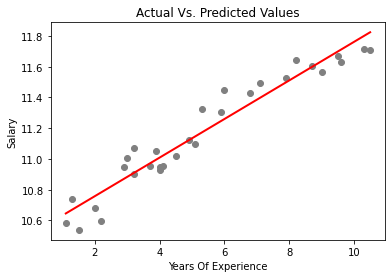

In [ ]:

# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.log_Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

Calculating Errors

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.log_Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.log_Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.log_Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.log_Salary, predicted_salary))

Mean Absolute Error: 0.07981492426092214
Mean Squared Error: 0.00894431117203028
Root Mean Squared Error: 0.09457436847280705
R^2 Score :           0.9319671194084196


In [ ]:
pred_df = pd.DataFrame({'Actual': np.exp(data1.log_Salary), 'Predicted': np.exp(predicted_salary)})
pred_df

,Actual,Predicted
0,39343.0,41998.957468
1,46205.0,43066.066794
2,37731.0,44160.289228
3,43525.0,47019.029189
4,39891.0,48213.688474
5,56642.0,52639.142472
6,60150.0,53303.675386
7,54445.0,54658.014935
8,64445.0,54658.014935
9,57189.0,58196.330788


Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.3369861234986835
Residuals are normally distributed


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


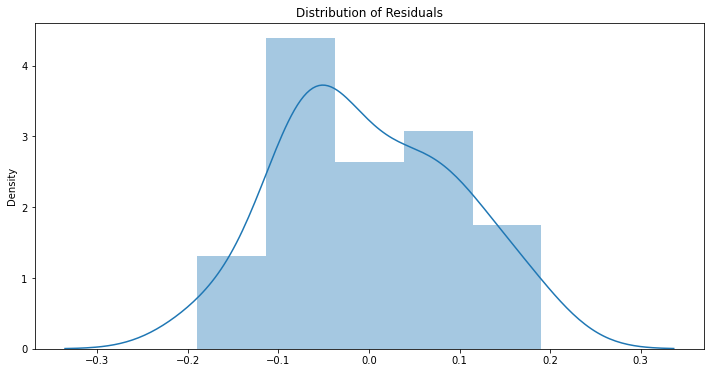

In [ ]:
residuals = data1.log_Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        11:36:52   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Building model with square root transformation
√Y = a + b * X + e

In [ ]:
# preparing data to build model
data1['sqrt_Salary'] = np.sqrt(data1.Salary)
data1.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,198.350700
1,1.3,46205.0,0.262364,10.740843,214.953483
2,1.5,37731.0,0.405465,10.538237,194.244691
3,2.0,43525.0,0.693147,10.681091,208.626460
4,2.2,39891.0,0.788457,10.593906,199.727314


In [ ]:
# Building model
sqrt_model = smf.ols('sqrt_Salary ~ YearsExperience', data = data1).fit()

Getting important parameters from mode

In [ ]:
# Coefficients Bo and B1
Bo, B1 = sqrt_model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (sqrt_model.tvalues, sqrt_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (sqrt_model.rsquared, sqrt_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  180.7002214054309
YearsExperience, B1:  17.05653205024198
tvalue:  Intercept          40.646251
YearsExperience    23.025247
dtype: float64
pvalue:  Intercept          1.920194e-26
YearsExperience    9.782891e-20
dtype: float64
R2:  0.9498353533865289
R2_Adj:  0.9480437588646192


Checking predictions of Model by equation
From the result Bo = 180.70022140543102

and

B1 = 17.056532050241962,

so our linear regression equation will become

√Y = Bo + B1X + e

√Y = 180.70022140543102 + 17.056532050241962*X + e

In [ ]:
predicted_salary = sqrt_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.sqrt_Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,198.350700,199.462407
1,214.953483,202.873713
2,194.244691,206.285019
3,208.626460,214.813286
4,199.727314,218.224592
5,237.995798,230.164164
6,245.254969,231.869818
7,233.334524,235.281124
8,253.860198,235.281124
9,239.142217,243.809390


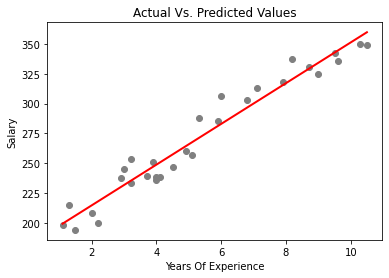

In [ ]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.sqrt_Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

Calculated Errors

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.sqrt_Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.sqrt_Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.sqrt_Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.sqrt_Salary, predicted_salary))

Mean Absolute Error: 9.321657712741535
Mean Squared Error: 119.6184556032736
Root Mean Squared Error: 10.937022245715402
R^2 Score :           0.9498353533865289


In [ ]:
pred_df = pd.DataFrame({'Actual': (data1.sqrt_Salary)**2, 'Predicted': (predicted_salary)**2})
pred_df

,Actual,Predicted
0,39343.0,39785.251671
1,46205.0,41157.743455
2,37731.0,42553.509262
3,43525.0,46144.747630
4,39891.0,47621.972517
5,56642.0,52975.542551
6,60150.0,53763.612294
7,54445.0,55357.207295
8,64445.0,55357.207295
9,57189.0,59443.018648


Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.11907877807580869
Residuals are normally distributed


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


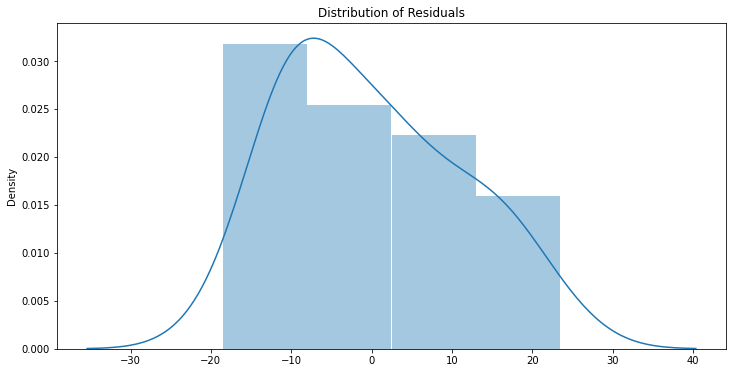

In [ ]:
residuals = data1.sqrt_Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_Salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           9.78e-20
Time:                        11:40:01   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:-
WE have found that while transform the model, got various values for MAE, RMSE, MSE and R 2 Values. Summery of the following Models